In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import numpy as np
import shutil
from sklearn import preprocessing
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import VGG16
from keras.applications import xception
from keras.applications import inception_v3
from keras.applications.vgg16 import preprocess_input
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import f1_score
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from glob import glob

c:\users\hp\anaconda3\envs\tf_env\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
base_dir = 'data'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

In [4]:
import tensorflow as tf
 
model = tf.keras.models.Sequential([
    #tf.keras.layers.LeakyReLU()
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='softmax'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(48, (5,5), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='sigmoid'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(2048, activation='relu'), 
    tf.keras.layers.Dense(3, activation='softmax')
    #tf.keras.layers.Dense(3, activation='softmax')
])

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 48)        38448     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 48)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)       

In [6]:
model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150),
                                                         shuffle=False)

Found 72 images belonging to 3 classes.
Found 36 images belonging to 3 classes.


In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=3,
                              epochs=20,
                              validation_steps = 3,
                              verbose=2)

Epoch 1/20
3/3 - 5s - loss: 12.1035 - accuracy: 0.3000 - val_loss: 1.5749 - val_accuracy: 0.3333
Epoch 2/20
3/3 - 3s - loss: 1.3263 - accuracy: 0.3167
Epoch 3/20
3/3 - 3s - loss: 1.1699 - accuracy: 0.3333
Epoch 4/20
3/3 - 3s - loss: 1.1092 - accuracy: 0.3846
Epoch 5/20
3/3 - 3s - loss: 1.0972 - accuracy: 0.4000
Epoch 6/20
3/3 - 4s - loss: 1.1093 - accuracy: 0.3333
Epoch 7/20
3/3 - 3s - loss: 1.1157 - accuracy: 0.3654
Epoch 8/20
3/3 - 3s - loss: 1.1073 - accuracy: 0.3333
Epoch 9/20
3/3 - 3s - loss: 1.1223 - accuracy: 0.2308
Epoch 10/20
3/3 - 3s - loss: 1.0983 - accuracy: 0.3000
Epoch 11/20
3/3 - 3s - loss: 1.1003 - accuracy: 0.3462
Epoch 12/20
3/3 - 3s - loss: 1.0987 - accuracy: 0.3846
Epoch 13/20
3/3 - 3s - loss: 1.1053 - accuracy: 0.3269
Epoch 14/20
3/3 - 3s - loss: 1.1060 - accuracy: 0.3462
Epoch 15/20
3/3 - 3s - loss: 1.1025 - accuracy: 0.3462
Epoch 16/20
3/3 - 3s - loss: 1.1125 - accuracy: 0.2167
Epoch 17/20
3/3 - 3s - loss: 1.1101 - accuracy: 0.3269
Epoch 18/20
3/3 - 4s - loss: 1.

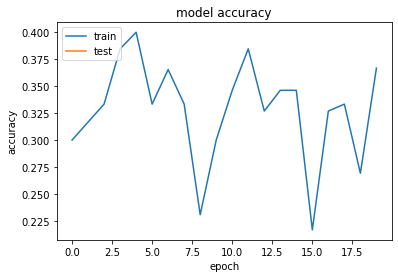

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()


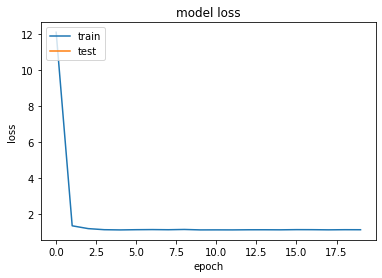

In [11]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [12]:
from sklearn.metrics import classification_report
from sklearn import preprocessing

y_pred = model.predict(validation_generator, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
print(classification_report(validation_generator.classes, y_pred_bool))

2/2 [==============================] - 1s 213ms/step
              precision    recall  f1-score   support

           0       0.33      1.00      0.50        12
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00        12

    accuracy                           0.33        36
   macro avg       0.11      0.33      0.17        36
weighted avg       0.11      0.33      0.17        36



c:\users\hp\anaconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\hp\anaconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\hp\anaconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
